In [ ]:
# initialization for my classroom
import os
from datetime import datetime as dt

def logfile(user=os.environ.get('JUPYTERHUB_USER') or 'jovyan'):
    prefix='/srv'
    if os.path.isdir(prefix) and os.access(prefix, os.W_OK):
        prefix+=('/'+user)
        if not os.path.isdir(prefix):
            os.makedirs(prefix)
    else:
        prefix='.'
    return prefix+'/'+dt.now().strftime('%Y%m%d')+'.log'

path=logfile()
#%logstop
%logstart -otq $path append

# [python - cannot override sys.excepthook - Stack Overflow](https://stackoverflow.com/questions/1261668/cannot-override-sys-excepthook/28758396)
# https://github.com/ipython/ipython/blob/e6432249582e05f438303ce73d082a0351bb383e/IPython/core/interactiveshell.py#L1952

import sys
import traceback
import IPython

try:
    _showtraceback
except NameError:
    _showtraceback=IPython.core.interactiveshell.InteractiveShell.showtraceback

try:
    _showsyntaxerror
except NameError:
    _showsyntaxerror=IPython.core.interactiveshell.InteractiveShell.showsyntaxerror

import logging
logging.basicConfig(filename=path.replace('.log','-exc.log'), format='%(asctime)s %(message)s', level=logging.ERROR, force=True)

import sys
import traceback
import IPython

def showtraceback(self, *args, **kwargs):
    etype, value, tb = self._get_exc_info(kwargs.get('exc_tuple'))
    stb = self.InteractiveTB.structured_traceback(
        etype, value, tb, tb_offset=kwargs.get('tb_offset'))
    logging.error(os.environ.get('JUPYTERHUB_USER') or 'jovyan')
    logging.error(self.InteractiveTB.stb2text(stb))
    _showtraceback(self, *args, **kwargs)

def showsyntaxerror(self, *args, **kwargs):
    etype, value, last_traceback = self._get_exc_info()
    elist = traceback.extract_tb(last_traceback) if kwargs.get('running_compiled_code') else []
    stb = self.SyntaxTB.structured_traceback(etype, value, elist)
    logging.error(os.environ.get('JUPYTERHUB_USER') or 'jovyan')
    logging.error(self.InteractiveTB.stb2text(stb))
    _showsyntaxerror(self, *args, **kwargs)

IPython.core.interactiveshell.InteractiveShell.showtraceback = showtraceback
IPython.core.interactiveshell.InteractiveShell.showsyntaxerror = showsyntaxerror

# プログラミングのない世界 (4)

## 機械学習 (Machine Learning)

### Multi-Layer Perceptron (MLP)

* [Artificial neural network - Wikipedia](https://en.wikipedia.org/wiki/Artificial_neural_network)
* [Multilayer perceptron - Wikipedia](https://en.wikipedia.org/wiki/Multilayer_perceptron)
* [Layer (deep learning) - Wikipedia](https://en.wikipedia.org/wiki/Layer_%28deep_learning%29)

![fig-1](https://upload.wikimedia.org/wikipedia/commons/e/e4/Artificial_neural_network.svg)

### MLPの応用
* [Pythonで多層パーセプトロンのXORゲートを実装する! | WATLAB -Python, 信号処理, 画像処理, AI, 工学, Web-](https://watlab-blog.com/2019/12/12/mlp-xor/)
* [python - Training a neural network to compute 'XOR' in scikit-learn - Stack Overflow](https://stackoverflow.com/questions/44896453/training-a-neural-network-to-compute-xor-in-scikit-learn)

xor (`^`) を機械学習する:

In [1]:
import numpy as np

In [2]:
import itertools

In [16]:
xs = np.array([[i,j] for i,j in itertools.product([0,1], repeat=2)])
xs

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [17]:
ys = np.array([i^j for i,j in xs])
ys

array([0, 1, 1, 0])

In [18]:
from sklearn.neural_network import MLPClassifier

In [19]:
clf = MLPClassifier(
    activation='relu',
    max_iter=200,
    hidden_layer_sizes=(4,),
    solver='lbfgs')
clf.fit(xs, ys)

MLPClassifier(hidden_layer_sizes=(4,), solver='lbfgs')

In [20]:
print('score:', clf.score(xs, ys))
print('predictions:', clf.predict(xs))

score: 1.0
predictions: [0 1 1 0]


In [95]:
clf.coefs_

[array([[ 3.50803219,  1.98571319, -3.69539419, -0.03942429],
        [-2.85303197,  1.99665838,  3.74661004, -0.13378218]]),
 array([[ 4.98362459],
        [-2.10302279],
        [ 4.7290484 ],
        [ 0.059105  ]])]

In [21]:
for ij in xs:
    print(clf.predict([ij])[0])

0
1
1
0


### 分類の評価
* [Classifier comparison — scikit-learn 1.1.1 documentation](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py)

In [22]:
from sklearn.inspection import DecisionBoundaryDisplay

In [23]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

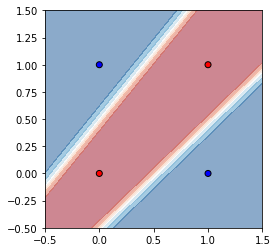

In [24]:
ax = plt.subplot()
DecisionBoundaryDisplay.from_estimator(
    clf, np.array(xs), # response_method="predict",
    ax=ax,
    alpha=0.5, eps=0.5, cmap=plt.cm.RdBu, 
)
ax.scatter(xs[:,0], xs[:,1], edgecolor="k", c=ys, cmap=ListedColormap(["#FF0000", "#0000FF"]))
ax.set_aspect('equal')
plt.show()

In [25]:
from mpl_toolkits.mplot3d import Axes3D

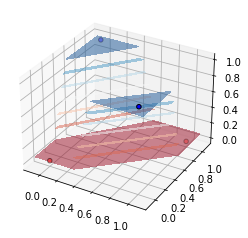

In [26]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
DecisionBoundaryDisplay.from_estimator(
    clf, xs, # response_method="predict",
    ax=ax,
    alpha=0.5, eps=0.1, cmap=plt.cm.RdBu, 
)
ax.scatter3D(xs[:,0], xs[:,1], ys, edgecolor="k", c=ys, cmap=ListedColormap(["#FF0000", "#0000FF"]))
#ax.set_aspect('equal')
plt.show()

繰り上がりを考慮:

In [27]:
xs = np.array(list(itertools.product(range(2), repeat=3)))
xs

array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 1],
       [1, 0, 0],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])

In [28]:
ys = np.array([list(map(int,"{:02b}".format(i+j+k))) for i,j,k in xs])
ys

array([[0, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 1]])

In [29]:
clf = MLPClassifier(activation='tanh',
                    max_iter=1000,
                    hidden_layer_sizes=(3,),
                    solver='lbfgs')
clf.fit(xs, ys)

MLPClassifier(activation='tanh', hidden_layer_sizes=(3,), max_iter=1000,
              solver='lbfgs')

In [30]:
print('score:', clf.score(xs, ys)) 
print('predictions:', clf.predict(xs))

score: 1.0
predictions: [[0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 1]]


In [31]:
clf.coefs_

[array([[ 3.08773431, -3.00828026, -4.80743718],
        [ 3.06346427, -2.89672144, -4.7664618 ],
        [ 3.57632817, -2.80218273, -4.66700198]]),
 array([[ 3.49724524,  8.44682476],
        [-2.42397339, -8.8919979 ],
        [-9.00864207,  8.8560093 ]])]

応用) 手書き文字認識

In [32]:
from sklearn import datasets
digits = datasets.load_digits()

In [38]:
digits.images.shape

(1797, 8, 8)

In [33]:
digits.images[3]

array([[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
       [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
       [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 10.,  8.,  0.],
       [ 0.,  0.,  8.,  4.,  5., 14.,  9.,  0.],
       [ 0.,  0.,  7., 13., 13.,  9.,  0.,  0.]])

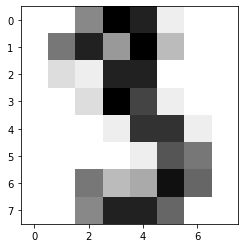

In [34]:
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(digits.images[3], cmap=plt.cm.gray_r)
plt.show()

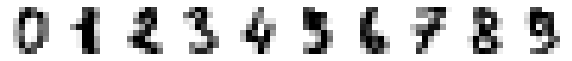

In [106]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    #ax.set_title("Training: %i" % label)

より大きなデータセットを使う

In [39]:
from sklearn.datasets import fetch_openml

In [40]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [42]:
X.shape, y.shape

((70000, 784), (70000,))

In [43]:
np.sqrt(784)

28.0

In [111]:
X[3].reshape((28,28))

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

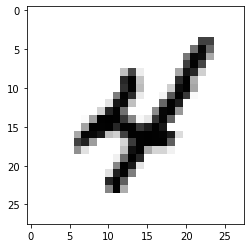

In [116]:
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(X[9].reshape((28,28)), cmap=plt.cm.gray_r)
plt.show()

In [114]:
y[9]

'4'

In [45]:
X = X / 255.0

In [46]:
X[3].reshape((28,28))

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

訓練 (train) 用と評価 (test) 用のデータセットに分割する:

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)

In [50]:
list(map(np.shape,(X_train,X_test,y_train,y_test)))

[(21000, 784), (49000, 784), (21000,), (49000,)]

In [51]:
mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=8,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.2,
)

In [53]:
import warnings
from sklearn.exceptions import ConvergenceWarning

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

Iteration 1, loss = 0.44139186
Iteration 2, loss = 0.19174891
Iteration 3, loss = 0.13983521
Iteration 4, loss = 0.11378556
Iteration 5, loss = 0.09443967
Iteration 6, loss = 0.07846529
Iteration 7, loss = 0.06506307
Iteration 8, loss = 0.05534985


In [54]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.986429
Test set score: 0.953061


In [55]:
mlp.predict([X_test[9]]), y_test[9]

(array(['7'], dtype='<U1'), '7')

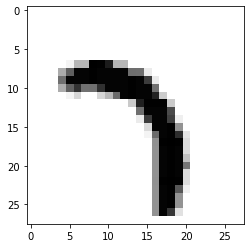

In [56]:
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(X_test[9].reshape((28,28)), cmap=plt.cm.gray_r)
plt.show()

機械学習の結果、各層には次に可視化するような重みが掛かるようになっている:

In [58]:
mlp.coefs_[0].shape

(784, 40)

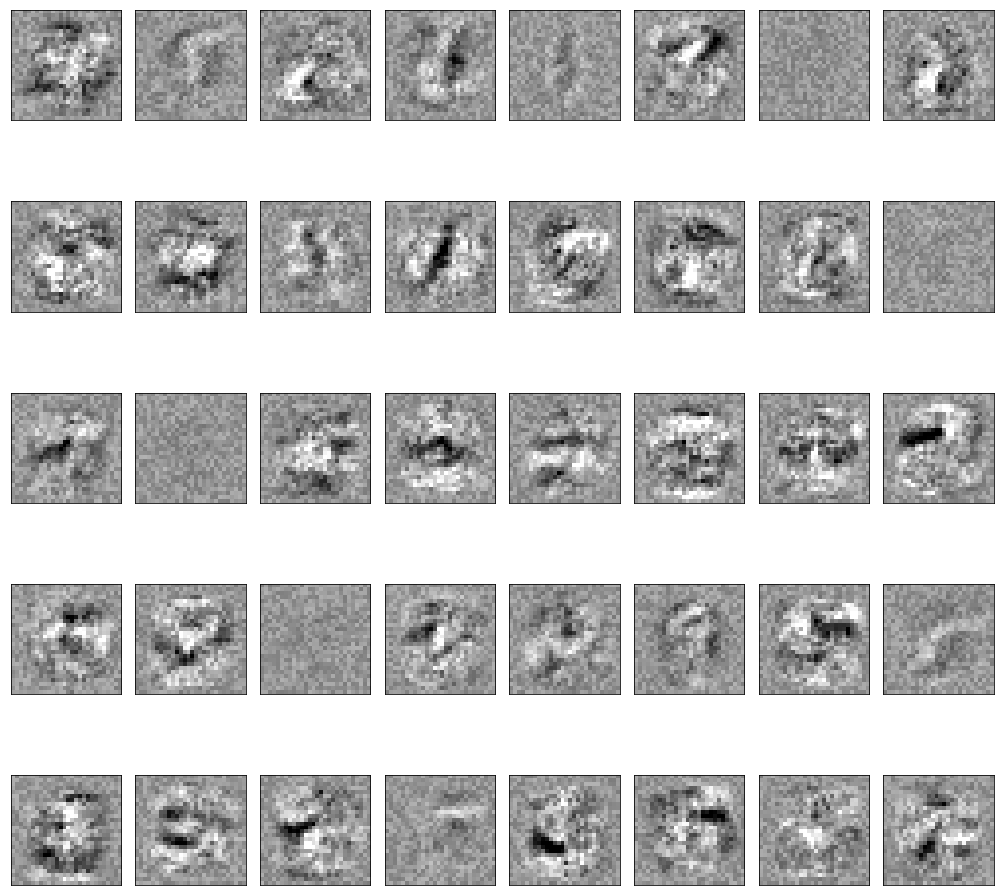

In [93]:
fig, axes = plt.subplots(5, 8, figsize=(14,14))
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_aspect('equal')

plt.tight_layout()
#plt.subplots_adjust(hspace=None)
plt.show()